<a href="https://colab.research.google.com/github/mfaysoares/PNAD-2015/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
sal_min = 788
choices = ['Até 2SM', 'De 2 a 5 SM', 'De 5 a 15 SM', 'De 15 a 25 SM', 'Acima de 25 SM']
conditions = [(dados['Renda'] < 2*sal_min),
              (dados['Renda'] >= 2*sal_min) & (dados['Renda'] < 5*sal_min),
              (dados['Renda'] >= 5*sal_min) & (dados['Renda'] < 15*sal_min),
              (dados['Renda'] >= 15*sal_min) & (dados['Renda'] < 25*sal_min),
              (dados['Renda'] >= 25*sal_min)]
dados['Faixa_Renda'] = np.select(conditions, choices, default = np.nan)
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Faixa_Renda
0,11,0,23,8,12,800,1.603808,Até 2SM
1,11,1,23,2,12,1150,1.739790,Até 2SM
2,11,1,35,8,15,880,1.760444,Até 2SM
3,11,0,46,2,6,3500,1.783158,De 2 a 5 SM
4,11,1,47,8,9,150,1.690631,Até 2SM
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,Até 2SM
76836,53,0,30,4,7,1500,1.792934,Até 2SM
76837,53,0,32,8,12,1300,1.830587,Até 2SM
76838,53,0,57,8,4,1500,1.726344,Até 2SM


### 2º Definir os labels das classes

In [ ]:
dados['Faixa_Renda']

0            Até 2SM
1            Até 2SM
2            Até 2SM
3        De 2 a 5 SM
4            Até 2SM
            ...     
76835        Até 2SM
76836        Até 2SM
76837        Até 2SM
76838        Até 2SM
76839        Até 2SM
Name: Faixa_Renda, Length: 76840, dtype: object

### 3º Construir a coluna de frequências

In [ ]:
dados_agg = dados.groupby('Faixa_Renda').agg({'Idade':'count'})
dados_agg.rename(columns = {'Idade':'Frequencia'}, inplace = True)
dados_agg = dados_agg.reset_index()
dados_agg

,Faixa_Renda,Frequencia
0,Acima de 25 SM,420
1,Até 2SM,49357
2,De 15 a 25 SM,823
3,De 2 a 5 SM,18972
4,De 5 a 15 SM,7268


### 4º Construir a coluna de percentuais

In [ ]:
dados_agg['Faixa Renda (%)'] = (dados_agg['Frequencia']/sum(dados_agg['Frequencia'])) * 100
dados_agg

,Faixa_Renda,Frequencia,Faixa Renda (%)
0,Acima de 25 SM,420,0.546590
1,Até 2SM,49357,64.233472
2,De 15 a 25 SM,823,1.071057
3,De 2 a 5 SM,18972,24.690265
4,De 5 a 15 SM,7268,9.458615


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
dados_agg.sort_values(by = ['Frequencia'], ascending=False, inplace = True)
dados_agg

,Faixa_Renda,Frequencia,Faixa Renda (%)
1,Até 2SM,49357,64.233472
3,De 2 a 5 SM,18972,24.690265
4,De 5 a 15 SM,7268,9.458615
2,De 15 a 25 SM,823,1.071057
0,Acima de 25 SM,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

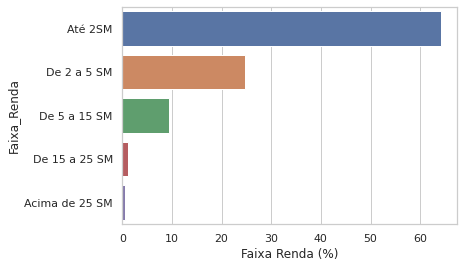

In [ ]:
ax = sns.barplot(x = dados_agg['Faixa Renda (%)'], y = dados_agg.Faixa_Renda)

> ### Conclusões

Analisando a amostra populacional, após categorizarmos os dados por faixas de renda, conclui-se que há uma maior concentração maior de moradores com renda de até 2 salários mínimos (aproximadamente R$ 1.576,00).

Por fim, também é possível determinar que a população é correlacionada inversamente com a renda, visto que quanto maior a faixa de renda, menor o número de moradores nessa faixa.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


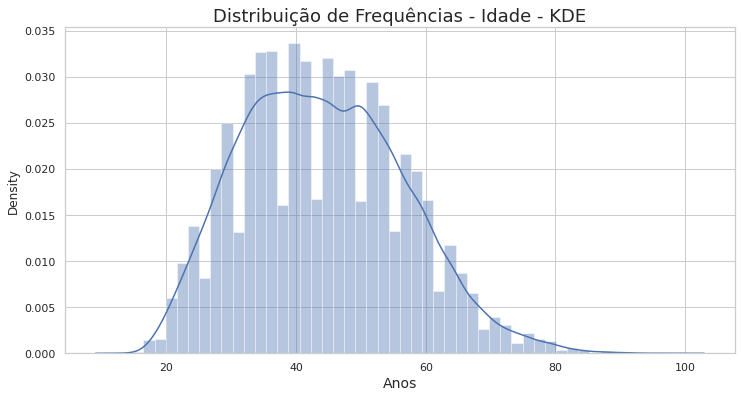

In [ ]:
#DADOS QUANTITATIVOS: Idade, Anos de Estudo, Renda e Altura

#Idade
ax = sns.distplot(dados.Idade)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Idade - KDE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


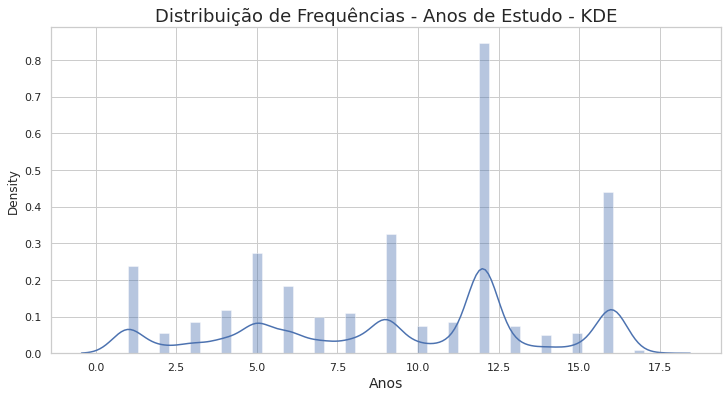

In [ ]:
#Anos de Estudo
ax = sns.distplot(dados['Anos de Estudo'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Anos de Estudo - KDE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


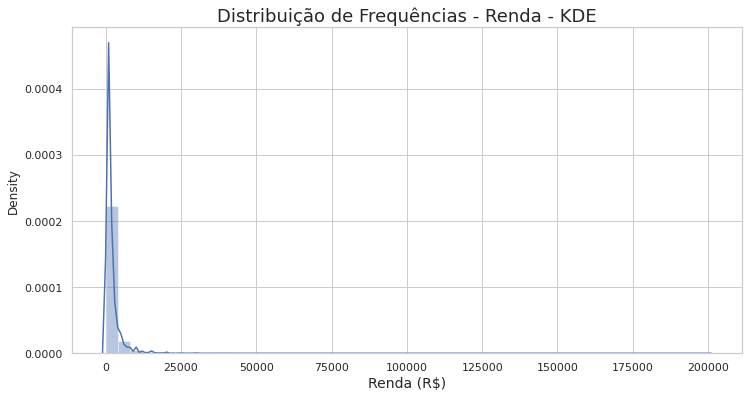

In [ ]:
#Renda
ax = sns.distplot(dados.Renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda - KDE', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


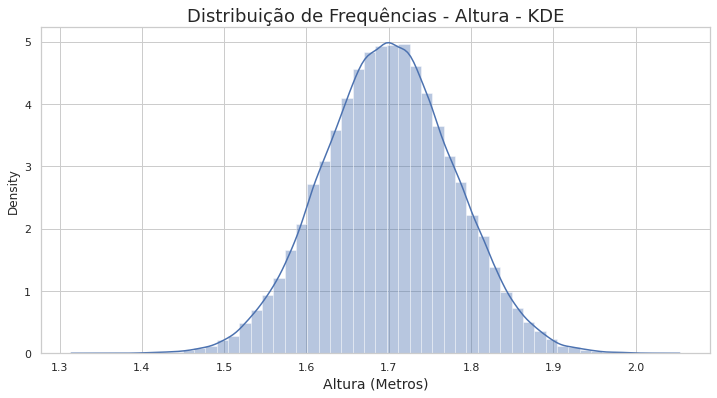

In [ ]:
#Altura
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Altura (Metros)', fontsize=14)
ax

> ### Conclusões

1.   Inicialmente, analisando o histograma da **Idade**, percebe-se que o mesmo apresenta uma distribuição simétrica com pico em aproximadamente 40 anos. Isso nos infere que a maioria dos moradores avaliados está nessa faixa de idade. Contudo, é notável que também ocorrem picos significativos entre 30 e 50 anos (aproximadamente). **Logo, podemos afirmar que há uma maior concentração de clientes entre 30 e 50 anos**.

2.   Já quando avaliamos **Anos de Estudo**, os dados se mostram bem dispersos com uma assimetria à esquerda. Caracteristica comum em dados assimétricos, o histograma apresenta mais de um pico, sendo eles em aproximadamente 1, 5, 9, 12 e 16 anos. **Conclui-se então, que há uma maior concentração de amostras dentro desses intervalos de anos de estudo**.

1.   Quando analisamos a **Renda**, percebe-se uma assimetria a direita. Essa análise complementa a avaliação da faixa de renda realizada anteriormente. **Dessa forma, percebemos há uma concentração quase que totalitária de clientes com uma renda baixa (pico do histograma), quando comparamos ao demais**. Ainda, infere-se que há uma pequena quantidade de clientes com uma renda bem elevada em torno de R$ 200.000,00.

2.   Por fim, no último histograma o qual avaliamos a **Altura**, percebemos que os dados apresentam uma distribuição simétrica, com pico em aproximadamente 1,70 metros. **Com isso, podemos afirmar que a altura média dos componentes da base é de 1,70 metros. Ademais, há uma maior concentração de pessoas entre 1,60m e 1,80m de altura**.



 

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


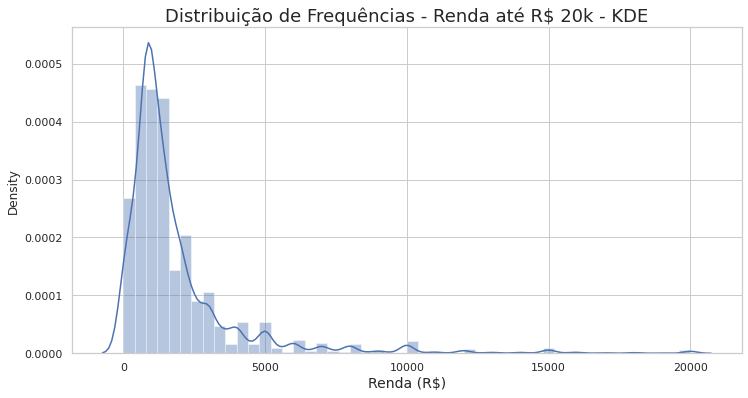

In [ ]:
dados_renda_20k = dados[dados['Renda'] <= 20000].reset_index(drop = True)

ax = sns.distplot(dados_renda_20k.Renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda até R$ 20k - KDE', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
freq = pd.crosstab(dados.Sexo,
                   dados.Cor)
freq.rename(index = sexo, inplace = True)
freq.rename(columns = cor, inplace = True)
freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
perc = pd.crosstab(dados.Sexo,
                   dados.Cor,
                   normalize = True) * 100
perc.rename(index = sexo, inplace = True)
perc.rename(columns = cor, inplace = True)
perc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Para indivíduos do sexo **Masculino**, há uma maior concentração de homens de cor Parda com aproximadamente 33% da amostra e de cor caucasiana (branco) com aproximadamente 28%. Já para o sexo **Feminino**, os dados apresentam uma melhor distribuição em relação a cor da pele, com uma maior predominância de mulheres de cor parda, com 14% aproximadamente. e mulheres de cor caucasiana, com 13%. 

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
media = dados['Renda'].mean()
media

2000.3831988547631

### Obtenha a mediana

In [ ]:
mediana = dados['Renda'].median()
mediana

1200.0

### Obtenha a moda

In [ ]:
moda = dados['Renda'].mode()
moda

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
dsv_med_abs = dados['Renda'].mad()
dsv_med_abs

1526.4951371644931

### Obtenha a variância

In [ ]:
var = dados['Renda'].var()
var

11044906.00622118

### Obtenha o desvio-padrão

In [ ]:
desv_pad = dados['Renda'].std()
desv_pad

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
new_df = pd.crosstab(dados.Sexo,
                   dados.Cor, 
                   values = dados.Renda,
                   aggfunc = {'mean'})
new_df.rename(index = sexo, inplace = True)
new_df.rename(columns = cor, inplace = True)
new_df

mean                                                    
Cor           Indígena       Branca        Preta      Amarela        Parda
Sexo                                                                      
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
new_df = pd.crosstab(dados.Cor,
                   dados.Sexo, 
                   values = dados.Renda,
                   aggfunc = {'mad', 'var', 'std'})
new_df.rename(index = cor, inplace = True)
new_df.rename(columns = sexo, inplace = True)
new_df

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

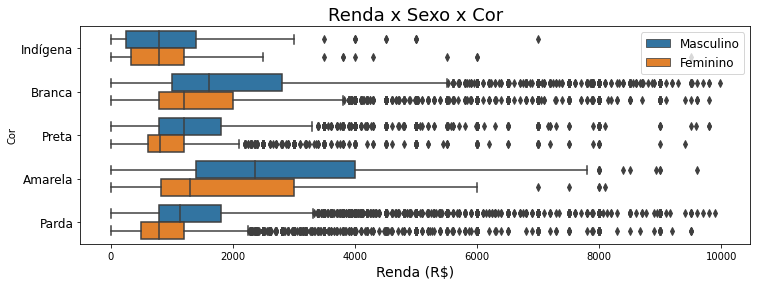

In [ ]:
#SEXO
ax = sns.boxplot( x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda x Sexo x Cor', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12) 
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

perc = stats.percentileofscore(dados['Renda'], 788, kind = 'weak')
perc

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
valor = dados.Renda.quantile(0.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
df_renda = pd.crosstab(dados['Anos de Estudo'],
                   dados['Sexo'], 
                   values = (dados.Renda).round(2),
                   aggfunc = {'mean', 'median', 'max', 'std'})

df_renda.rename(columns = sexo, inplace = True)
df_renda.rename(index = anos_de_estudo, inplace = True)
df_renda

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   30000.0   10000.0   799.494638   516.201748   
1 ano                            30000.0    2000.0   895.629047   492.771987   
2 anos                           40000.0    4000.0   931.178986   529.911638   
3 anos                           80000.0    3500.0  1109.203862   546.853916   
4 anos                           50000.0   10000.0  1302.329283   704.279111   
5 anos                           35000.0    8000.0  1338.653218   781.389776   
6 anos                           25000.0    6000.0  1448.875419   833.732824   
7 anos                           40000.0    9000.0  1465.497940   830.751004   
8 anos                           30000.0   18000.0  1639.396667   933.615351   
9 anos                           60000.0   20000.0  1508.038850   868.021700   
10 anos                          45000.0    6000.0  1731.270847   925.919225   
11 anos                         200000.0  100000.0  2117.060504  1286.790889   
12 anos                          30000.0  120000.0  2470.330776  1682.313725   
13 anos                          25000.0   20000.0  3195.099154  1911.730047   
14 anos                          50000.0   20000.0  3706.620269  2226.460457   
15 anos ou mais                 200000.0  100000.0  6134.279790  3899.513231   
Não determinados                  7000.0    3000.0  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

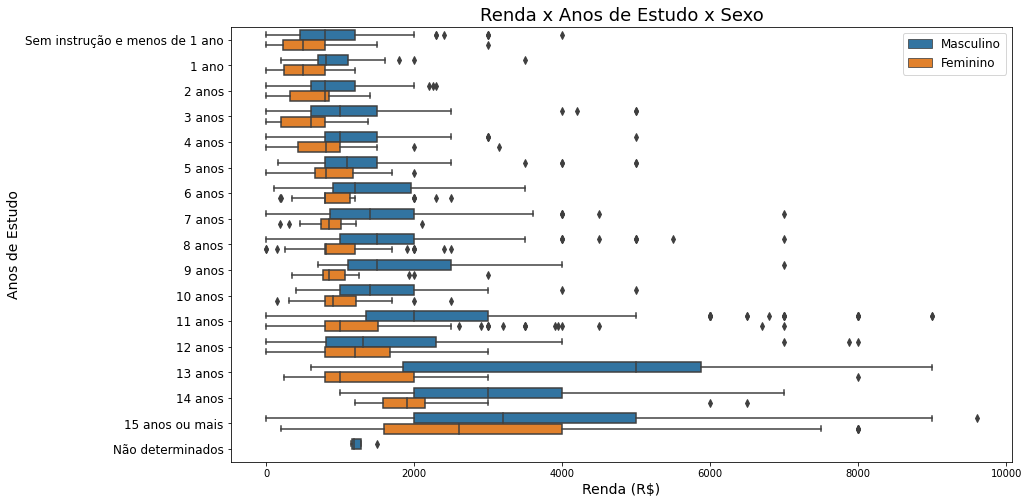

In [ ]:
#RENDA x ANOS DE ESTUDO x SEXO
ax = sns.boxplot( x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'), orient = 'h')

ax.figure.set_size_inches(14, 8)
ax.set_title('Renda x Anos de Estudo x Sexo', fontsize=18)

ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)

ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
dados_uf = dados.groupby('UF').agg({'Renda':['mean', 'median', 'max', 'std']})
dados_uf.rename(index = uf, inplace = True)

dados_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

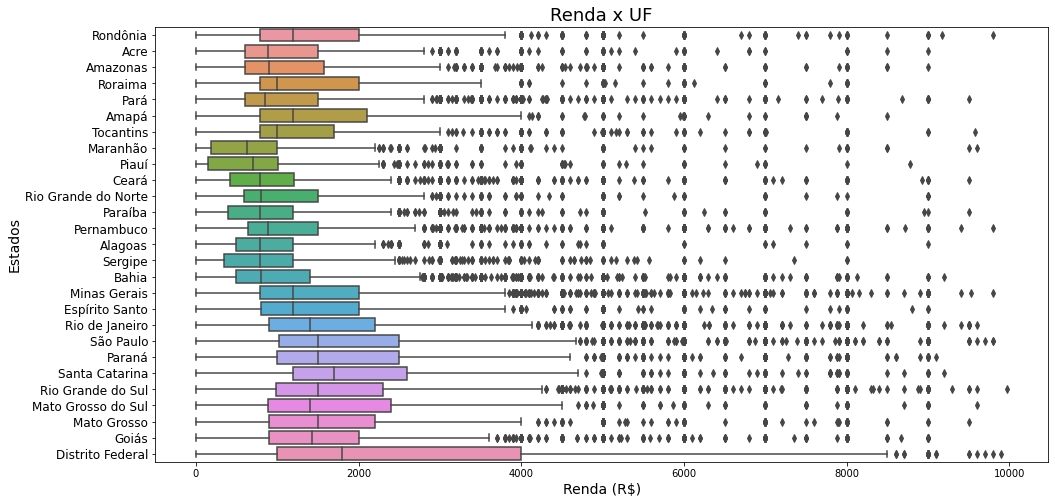

In [ ]:
#RENDA x UF
ax = sns.boxplot( x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(16, 8)

ax.set_title('Renda x UF', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)

ax.set_ylabel('Estados', fontsize=14)
ax.set_yticklabels([key for key in uf.values()], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...